# Packages : NO CHANGE REQ

In [1]:
import os, sys
from math import sqrt, isnan
import matplotlib.pyplot as plt
# setting the utilities required for loading the data
sys.path.append('utilities/')
from loadDataUtility import *
from graphGenerationUtilities import *
import pandas as pd
import numpy as np

2023-02-03 07:56:56.311198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# DATA INPUT 
Input the corresponding file path, target byte,number of traces (recomended max avaiable in npz) and attack window.  
Corresponding Values:  
STM32F: 1800_2800  
XMEGA : 1200_2800  

In [2]:
data_params = {
    "input_path": '/home/mabon/old/OneDrive_datasets/original/xmega_unmasked/X1_K1_200k.npz', # path to the input file
    "target_byte": 0, # byte on which analysis is to be performed
    "start_idx": 1200, # These values depend on the architecture being tested
    "end_idx": 2200,
    "n": 20000, # This value should be equivalent to the number of power traces in the input file
    # path to save csv file containing time and nicv value (IGNORE THIS)
    "path_to_save_nicv":"result/",
    "figure_output_path": " ",
    "result_output_path": " "
}


# Enter path to save plots

In [3]:
pltpath='tempoutput/'

In [4]:
data_params2=data_params
# The directory to save the files is created.( This is a temp dump do not worry about this )
model_dir_path = data_params["path_to_save_nicv"]
if not os.path.isdir(model_dir_path):
    os.makedirs(model_dir_path)

preparing data ...
shape of the power traces:  (200000, 5000)
shape of the plaintext :  (200000, 16)
Ground Truth for the key :  [ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
--------------------------------------------------------------------------------
processing data...
generating features and labels for the key byte value:  43
reshaped power traces:  (10000, 1000)
shape of the labels:  (10000,)
Saving test vector leakage assessment results to csv file...
Normalized Inter-Class Variance results sucessfully saved to csv file: result/target-byte-0.csv


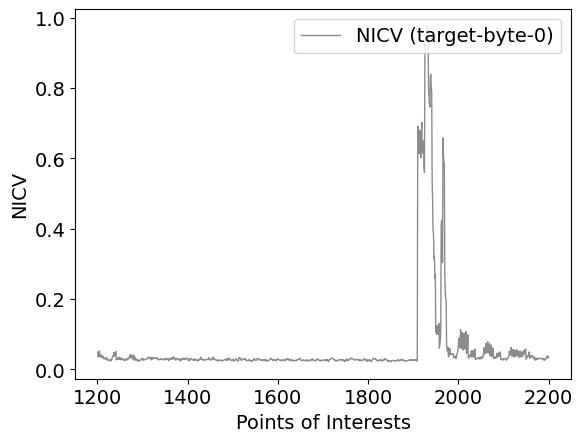

In [5]:
%run "notebookutility/nicv.ipynb" -data_params -pltpath

index of data ['power_trace', 'plain_text', 'key']
shape of the traces:  (200000, 5000)
shape of the plaintext :  (200000, 16)
Ground Truth for the key :  [ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
real key: 43
generating features and labels for the key byte value:  43
processed traces shape is (200000, 1000), data type is <class 'numpy.ndarray'>
generated labels shape is (200000,), number of class 256, data type is <class 'numpy.ndarray'>


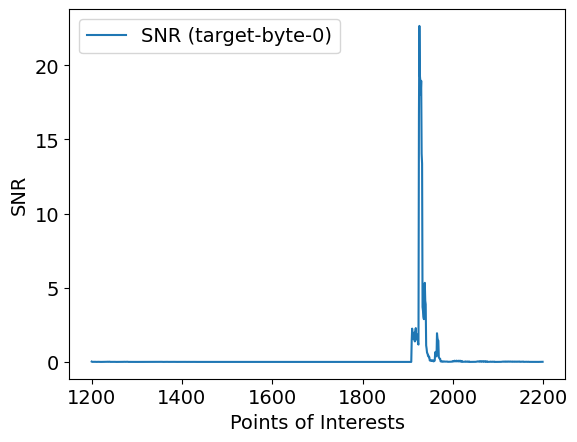

In [6]:
%run "notebookutility/snr.ipynb" -data_params2 -data_params2 -pltpath

In [7]:
%run "notebookutility/cpa.ipynb" -data_params2

(10000, 5000)
(200000, 16)
['0x2b', '0x7e', '0x15', '0x16', '0x28', '0xae', '0xd2', '0xa6', '0xab', '0xf7', '0x15', '0x88', '0x9', '0xcf', '0x4f', '0x3c']
✔️ OK to continue!
✔️ OK to continue!
(200000, 5000)


notebookutility/cpa.ipynb:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  "outputs": [],


  0%|          | 0/256 [00:00<?, ?it/s]

notebookutility/cpa.ipynb:16: RuntimeWarning: invalid value encountered in true_divide
  "trace_num = data_params2['n']\n",


Key guess:  0x0
Correlation:  nan
Correct Key:  0x2b
['0x2b', '0x7e', '0x15', '0x16', '0x28', '0xae', '0xd2', '0xa6', '0xab', '0xf7', '0x15', '0x88', '0x9', '0xcf', '0x4f', '0x3c']
